In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LinearRegression

In [105]:
data=pd.read_csv('CFish_dataset.csv')

In [106]:
# Seeing the top 5 variables
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Coumn Description:
Species: Species name of fish
Weight: Weight of fish
Length1: Vertical length
Length2: Diagonal length
Length3: Cross length 
Height: Height
Width: Diagonal width 
Our dependent or target variable is 'Weight'. Independent variables are 'species', different lengths, 'height' and 'width'.



In [107]:
# rename to more meaningul names
data.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
data.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [108]:
# shape of the datframe
data.shape

(159, 7)

In [109]:
# finding about the data types,shape and presence of null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    159 non-null    object 
 1   Weight     159 non-null    float64
 2   LengthVer  159 non-null    float64
 3   LengthDia  159 non-null    float64
 4   LengthCro  159 non-null    float64
 5   Height     159 non-null    float64
 6   Width      159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# Missing Values

In [110]:
# finding out which column has missing values
data.isnull().sum()

Species      0
Weight       0
LengthVer    0
LengthDia    0
LengthCro    0
Height       0
Width        0
dtype: int64

we found out that there are no missing values

# Count of Species


In [111]:
Species_count=data['Species'].value_counts()
Species_count

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

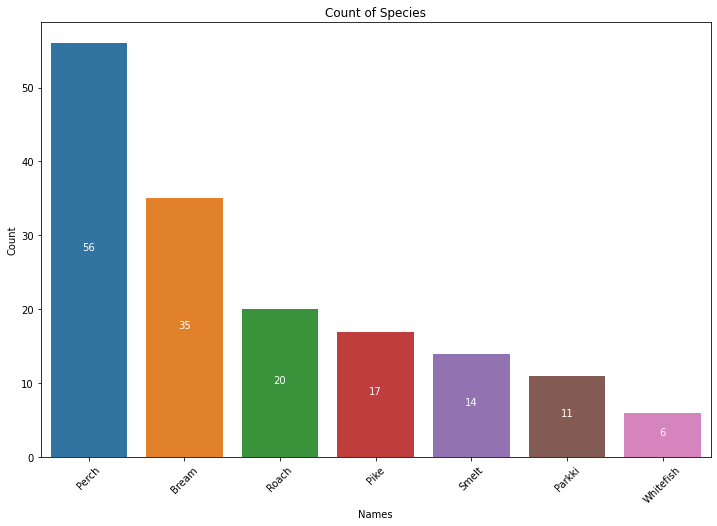

In [112]:
# 1.  Plot a bar chart showing count of individual species
plt.figure(figsize=(12, 8))
count_bar=sns.barplot(x=Species_count.index, y=Species_count.values)
plt.title('Count of Species')
plt.xlabel('Names')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i in range(len(Species_count)):
    count_bar.text(i, Species_count[i]/2, str(Species_count[i]), color ="white", horizontalalignment = "center")

# Numerical Column Detection

In [113]:
num_col=[col for col in data.columns if data[col].dtypes!='O' ]

In [114]:
num_col

['Weight', 'LengthVer', 'LengthDia', 'LengthCro', 'Height', 'Width']

# Categorical Column Detection


In [115]:
cat_col=[col for col in data.columns if data[col].dtypes=='O' ]
cat_col                           

['Species']

# Outliers Detection

In [116]:
data.describe()

,Weight,LengthVer,LengthDia,LengthCro,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


C:\Users\Win\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


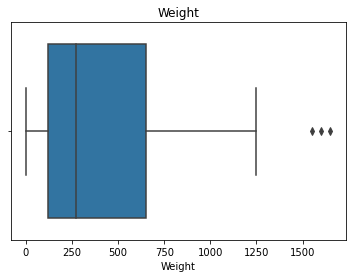

C:\Users\Win\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


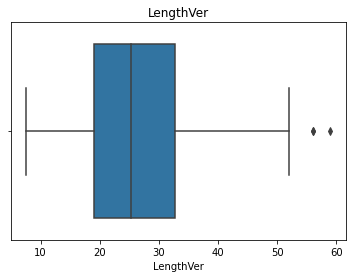

C:\Users\Win\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


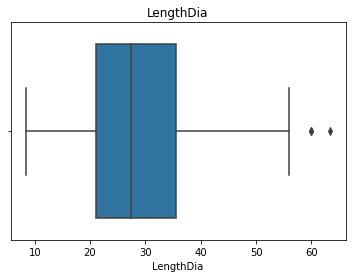

C:\Users\Win\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


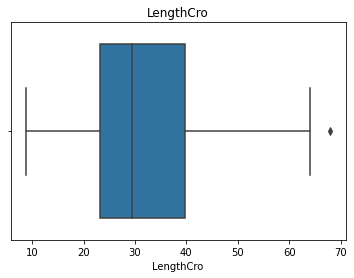

C:\Users\Win\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


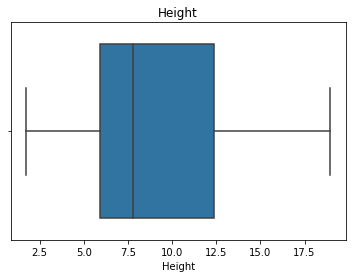

C:\Users\Win\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


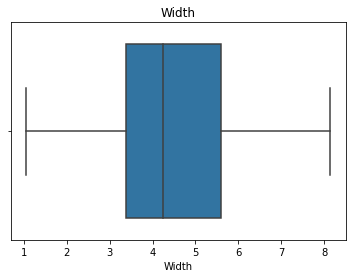

In [117]:
for col in num_col:
    plt.title(col)
    sns.boxplot(data[col])
    plt.show()

In [118]:
# Creating a function called outliers in order to help find all the outliers in the given data on different columns
def outliers(data, col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    #lower bound is Quartile1-(1.5*IQR)
    lb=Q1-1.5*IQR
    # upper bound is Quartile3+(1.5*IQR)
    ub=Q3+1.5*IQR
    # returning outlier data
    return data[ (data[col]<lb) | (data[col]>ub) ]

In [119]:
for col in num_col:
    print( col)
    print(outliers(data, col))
    print("\n")

Weight
    Species  Weight  LengthVer  LengthDia  LengthCro  Height  Width
142    Pike  1600.0       56.0       60.0       64.0   9.600  6.144
143    Pike  1550.0       56.0       60.0       64.0   9.600  6.144
144    Pike  1650.0       59.0       63.4       68.0  10.812  7.480


LengthVer
    Species  Weight  LengthVer  LengthDia  LengthCro  Height  Width
142    Pike  1600.0       56.0       60.0       64.0   9.600  6.144
143    Pike  1550.0       56.0       60.0       64.0   9.600  6.144
144    Pike  1650.0       59.0       63.4       68.0  10.812  7.480


LengthDia
    Species  Weight  LengthVer  LengthDia  LengthCro  Height  Width
142    Pike  1600.0       56.0       60.0       64.0   9.600  6.144
143    Pike  1550.0       56.0       60.0       64.0   9.600  6.144
144    Pike  1650.0       59.0       63.4       68.0  10.812  7.480


LengthCro
    Species  Weight  LengthVer  LengthDia  LengthCro  Height  Width
144    Pike  1650.0       59.0       63.4       68.0  10.812   7.48


Hei

In [120]:
df = data.copy()
def fill_outliers(data, col):

    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    #lower bound is Quartile1-(1.5*IQR)
    lb=Q1-1.5*IQR
    # upper bound is Quartile3+(1.5*IQR)
    ub=Q3+1.5*IQR

    df.loc[(data[col] < lb), col] = lb
    df.loc[(data[col] > ub),  col] = ub
    
    return data

In [122]:
for i in num_col:
    
     fill_outliers(df, i) 
        

In [124]:
for col in num_col:
    print( col)
    print(outliers(df, col))
    print("\n")


Weight
Empty DataFrame
Columns: [Species, Weight, LengthVer, LengthDia, LengthCro, Height, Width]
Index: []


LengthVer
Empty DataFrame
Columns: [Species, Weight, LengthVer, LengthDia, LengthCro, Height, Width]
Index: []


LengthDia
Empty DataFrame
Columns: [Species, Weight, LengthVer, LengthDia, LengthCro, Height, Width]
Index: []


LengthCro
Empty DataFrame
Columns: [Species, Weight, LengthVer, LengthDia, LengthCro, Height, Width]
Index: []


Height
Empty DataFrame
Columns: [Species, Weight, LengthVer, LengthDia, LengthCro, Height, Width]
Index: []


Width
Empty DataFrame
Columns: [Species, Weight, LengthVer, LengthDia, LengthCro, Height, Width]
Index: []




In [127]:
df.shape

(159, 7)

In [128]:
# no outiers found replacing our current data with the data without outliers
data=df.copy()

In [85]:
# removing outliers
# since in most coumns outliers are lying in t3 rows so we are deleting those rows so as to remove the outliers
#data.drop([142, 143, 144], inplace=True)

In [129]:
data.shape

(159, 7)

In [130]:
data.describe()

,Weight,LengthVer,LengthDia,LengthCro,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,395.401887,26.175000,28.342453,31.204403,8.970994,4.417486
std,348.555952,9.782457,10.499859,11.541386,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1445.000000,53.175000,57.250000,64.400000,18.957000,8.142000


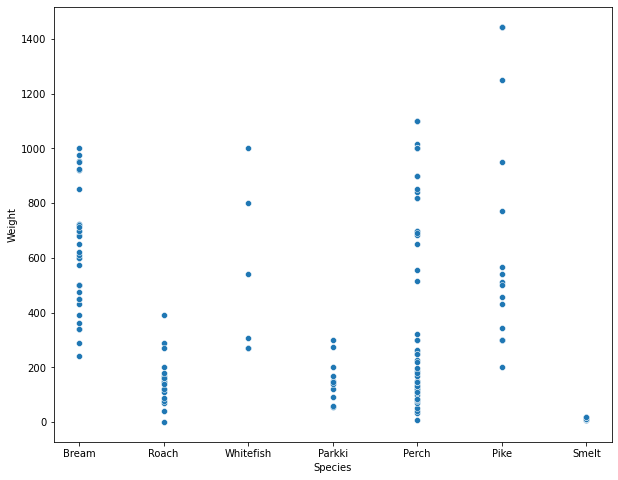

In [146]:

plt.figure(figsize=(10,8))

sns.scatterplot(data = df, y="Weight", x="Species",sizes=(30, 300));

In [192]:
#Dependant (Target) Variable:
y = data['Weight']
# Independant Variables:
#Species is avoided because its categorical and does not have much significance
X = data.iloc[:,2:7] 

In [193]:
# Buiding the regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [194]:
# Buiding the regression model
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [195]:
print('intercept: ', lr.intercept_)
print('coefficients: ', lr.coef_)

intercept:  -481.22132608931537
coefficients:  [ 54.62974653 -53.35652691  16.52981732   5.29009459  89.27604445]


In [196]:
# regression equation is 
print('y = ' + str('%.2f' % lr.intercept_) + ' + ' + str('%.2f' % lr.coef_[0]) + 'X1 ' + str('%.2f' % lr.coef_[1]) + ' + ' + 'X2 ' +
      str('%.2f' % lr.coef_[2]) + 'X3 + ' + str('%.2f' % lr.coef_[3]) + 'X4 + ' + str('%.2f' % lr.coef_[4]) + 'X5')

y = -481.22 + 54.63X1 -53.36 + X2 16.53X3 + 5.29X4 + 89.28X5


In [197]:
y_pred = lr.predict(X_test)
y_pred

array([ 768.6279492 ,  176.31424741,  573.13232602,  189.39741682,
         67.39314205,  652.46633815,  218.34695546,  536.83396086,
        173.28690213,  236.79201624,  171.75808175,  195.10505207,
        -89.20147685,  362.96044113,  721.28718433,  211.85306429,
        175.03122502,  545.74766467,  425.40886529,  296.10515894,
       -166.34085608,  -36.62443571,  310.83913086,  483.60845654,
        165.71143888,  761.29642047,  602.32211048, -214.81261946,
       1026.25951324,  194.00787766,  930.85347078,  341.70828472])

In [198]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.81482716 0.85594417 0.87983397 0.93374631 0.92019603 0.89687865
 0.9068412  0.84539732 0.80218559 0.82186109]


In [199]:
cross_val_score_train.mean()

0.8677711504658319

In [200]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred))

0.867132842973495


Compare real and predicted weights and give a
conclusion statement based on it?

In [201]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Weight'])
y_pred1.head()

,Estimated Weight
0,768.627949
1,176.314247
2,573.132326
3,189.397417
4,67.393142


In [202]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,1000.0
1,120.0
2,600.0
3,130.0
4,85.0


In [203]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,Weight,Estimated Weight
0,1000.0,768.627949
1,120.0,176.314247
2,600.0,573.132326
3,130.0,189.397417
4,85.0,67.393142
5,650.0,652.466338
6,145.0,218.346955
7,500.0,536.833961
8,0.0,173.286902
9,145.0,236.792016


The predicted weights are comparatively lower than actual weights.